## The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### Read the dataset using function .dropna() - to avoid dealing with NAs 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
veh = pd.read_csv("vehicle.csv").dropna()

### Sample the data and check the data for any missing values

In [3]:
veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
veh.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


In [6]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [7]:
veh.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

### Drop the independent variable and store it in a different dataframe Y and store all the independent variables in dataframe X 

In [8]:
veh_ind = veh.drop('class', axis=1)

In [9]:
veh_dep = veh['class']

### Standardize the independent variables using z scores or Standard scalar function 

Note: Since we are not going to perform any supervised learning model on the clusters, we are not splitting the data into test and training

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
veh_std =  sc.fit_transform(veh_ind)

### Print the covariance matrix for the standardized independent data

In [11]:
cov_matrix = np.cov(veh_std.T)
print('Covariance Matrix \n%s', cov_matrix)

('Covariance Matrix \n%s', array([[ 1.00123153,  0.69073497,  0.79092746,  0.68897729,  0.09066804,
         0.1505537 ,  0.81502868, -0.78902127,  0.81522961,  0.67573322,
         0.76532752,  0.82125027,  0.58212123, -0.25875528,  0.23193313,
         0.16859183,  0.29656022,  0.3732647 ],
       [ 0.69073497,  1.00123153,  0.79868656,  0.62471862,  0.15521415,
         0.25192897,  0.85920548, -0.8261242 ,  0.85719089,  0.96655501,
         0.80710097,  0.85197956,  0.93674669,  0.0491303 ,  0.1419004 ,
        -0.00197723, -0.1140426 ,  0.04939203],
       [ 0.79092746,  0.79868656,  1.00123153,  0.77235395,  0.16358689,
         0.26591783,  0.91014241, -0.9138366 ,  0.89836576,  0.77441118,
         0.86674929,  0.89288735,  0.70655787, -0.23843852,  0.11041593,
         0.278193  ,  0.14543699,  0.34365085],
       [ 0.68897729,  0.62471862,  0.77235395,  1.00123153,  0.66819724,
         0.45301698,  0.74438595, -0.79674104,  0.71709175,  0.57118076,
         0.80778118,  0.73

### Print the eigen value and vectors and sort them

In [12]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

('Eigen Vectors \n%s', array([[ 2.74447428e-01,  1.27105989e-01, -1.15778231e-01,
        -8.00766389e-02,  7.01971756e-02,  1.41269187e-01,
         4.78882430e-01, -5.51289488e-01,  4.70291162e-01,
         2.71011706e-01, -3.88480982e-02,  3.37118452e-02,
         1.68590056e-01, -4.08522941e-02,  3.33699383e-02,
         4.49941671e-02, -8.72862091e-03,  4.27500161e-04],
       [ 2.94003600e-01, -1.34430321e-01, -3.64513515e-02,
        -1.90342131e-01, -8.66726774e-02, -2.78132128e-01,
        -2.32112671e-01, -1.77146565e-01,  8.14934003e-03,
        -8.72464933e-02,  1.10855608e-02, -1.12606467e-01,
        -6.30087058e-02,  1.60416148e-01, -4.20446984e-01,
         6.57048309e-01, -1.69794331e-01,  1.73650656e-02],
       [ 3.04380218e-01,  7.21448351e-02, -5.51881577e-02,
         6.93709791e-02,  3.89590342e-02, -1.36322721e-01,
         6.01737282e-02,  4.36495932e-01,  1.76997855e-01,
         2.14799970e-01, -7.02546566e-01, -2.85482662e-02,
        -2.16299609e-01, -2.136

### Plot the cumulative variance explained plot and select the number of components = 10

In [13]:
eig_tot = sum(eig_vals)#[np.sum(eig_vals) for arr in eig_vals] # [np.sum(arr) for arr in data]
print(eig_tot)
#sum(v for k, v in eig_vals.items() if 'W' in k)
eig_var = [(arr/eig_tot)*100 for arr in eig_vals] # [np.sum(arr) for arr in data]
print(eig_var)

18.022167487684747
[52.45421787102295, 16.58856448401107, 10.64071350706088, 6.492653904778656, 5.155287358284021, 2.9528695776308225, 1.9924005820948842, 1.2338184376584191, 0.8661174766400785, 0.5150275126135102, 0.35250644840891865, 0.2463192088533332, 0.19288677849320437, 0.11769018297937131, 0.08941923345179242, 0.07273264199929691, 0.03474472093223145, 0.002030073086557422]


<Container object of 18 artists>

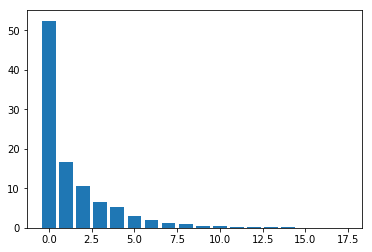

In [14]:
plt.bar(range(18), eig_var)

### Use K means over the reduced dataset

In [23]:
from sklearn.decomposition import PCA
veh_red = PCA(n_components=10).fit_transform(veh_ind)

### Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [27]:
distortions = []

### Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model Using c distance - Get the measure for Sum of squares error.

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(veh_red)
    kmeanModel.fit(veh_red)
    distortions.append(
        sum(np.min(cdist(veh_red, kmeanModel.cluster_centers_, 'euclidean'), axis=1))/ veh_red.shape[0])

### Plotting Elbow/ Scree Plot - Find optimal K

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

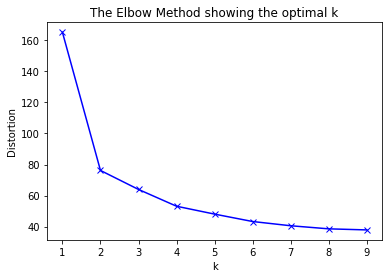

In [29]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Use kmeans.labels_ function to print out the labels of the classes

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(veh_red)
print(kmeans.labels_)
clusters = kmeans.labels_

[0 0 1 0 0 0 3 3 3 3 0 0 2 1 3 2 1 0 3 0 0 1 0 3 1 2 0 0 3 3 1 0 0 0 1 0 1
 3 0 0 1 0 3 0 0 0 3 0 1 0 1 3 2 0 1 3 2 3 3 0 2 0 1 0 2 1 2 3 0 2 0 0 0 1
 3 0 0 1 0 3 2 3 1 0 2 0 0 1 0 0 2 0 0 0 3 3 2 2 0 0 2 0 0 0 3 0 0 2 1 2 3
 0 0 3 0 0 0 0 0 2 2 0 2 3 1 0 0 3 3 0 0 1 0 0 1 0 0 0 3 2 2 0 1 0 1 0 3 0
 3 2 0 3 1 1 0 1 0 3 1 1 0 1 0 0 2 0 3 1 3 0 3 2 2 0 0 1 0 2 0 1 0 0 1 0 0
 0 0 0 1 1 3 0 0 0 1 2 3 0 1 3 0 1 0 3 1 0 0 3 0 1 3 1 0 3 3 0 1 3 0 0 1 0
 0 0 0 1 0 3 0 0 1 3 1 0 0 0 1 0 0 2 1 3 2 3 3 2 0 0 3 3 0 2 0 1 0 0 3 1 0
 2 0 0 1 0 0 2 3 3 0 0 3 1 0 2 3 2 2 1 0 0 3 0 0 1 1 2 2 0 0 2 0 3 3 2 3 1
 1 0 2 0 0 2 0 0 0 2 1 0 1 1 0 1 0 0 0 3 3 1 1 1 0 0 3 2 0 0 0 2 2 0 1 0 2
 1 2 0 0 0 2 0 3 0 0 2 0 0 3 1 1 3 3 1 3 1 0 1 3 0 2 0 0 1 0 3 0 0 2 0 0 0
 3 1 0 1 3 2 0 3 3 0 0 0 3 0 3 0 1 0 0 0 3 1 3 0 2 3 1 0 1 3 1 1 0 0 1 3 3
 0 2 2 2 0 3 2 1 0 2 1 1 0 0 0 0 0 2 0 3 0 1 2 3 2 0 0 2 0 0 1 3 3 1 1 1 0
 1 1 0 2 0 1 1 0 3 0 0 1 0 0 1 1 0 0 1 1 0 0 3 1 1 1 3 0 2 1 1 0 0 1 0 0 1
 0 3 3 0 1 0 3 2 3 0 1 0 

### Observe the previous internal lab assessment on K means - Look at the final result of clustering. Observe after reducing the components, has the clustering changed?

What is your inference?

In [32]:
#Clustering in this method is resulting in 4 clusters 

(813,)

In [34]:
veh_red_df = pd.DataFrame(veh_red)

In [35]:
veh_red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 10 columns):
0    813 non-null float64
1    813 non-null float64
2    813 non-null float64
3    813 non-null float64
4    813 non-null float64
5    813 non-null float64
6    813 non-null float64
7    813 non-null float64
8    813 non-null float64
9    813 non-null float64
dtypes: float64(10)
memory usage: 63.6 KB
